In [1]:
# ================================================================================
# Splitting training and test sets
# ================================================================================
# you will need to do lots of data cleaning and preparation before any analysis. I recommend that you do this first 
# to the entire dataset, then apply the sampling commands above to the cleaned data set, 
# to get your test and train samples

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt



data=pd.read_excel('caschool.xlsx')


data=data.iloc[:, :18]


#490155963
#490161470
#490172878
state=490172878+490161470+490155963 # replace this number with the sum of the student IDs for the members of the group
print(state)


train = data.sample(frac=0.8, random_state=state)
test = data[data.index.isin(train.index)==False].copy() # Only for prediction

train=train.reset_index(drop=True)
test=test.reset_index(drop=True)



1470490311


In [2]:
data.shape

(420, 18)

In [3]:
data.head

<bound method NDFrame.head of      Observation Number  dist_cod       county  \
0                     1     75119      Alameda   
1                     2     61499        Butte   
2                     3     61549        Butte   
3                     4     61457        Butte   
4                     5     61523        Butte   
..                  ...       ...          ...   
415                 416     68957    San Mateo   
416                 417     69518  Santa Clara   
417                 418     72611      Ventura   
418                 419     72744         Yuba   
419                 420     72751         Yuba   

                            district gr_span  enrl_tot    teachers   calw_pct  \
0                 Sunol Glen Unified   KK-08       195   10.900000   0.510200   
1               Manzanita Elementary   KK-08       240   11.150000  15.416700   
2        Thermalito Union Elementary   KK-08      1550   82.900002  55.032299   
3    Golden Feather Union Elementary   KK-08 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Observation Number  420 non-null    int64  
 1   dist_cod            420 non-null    int64  
 2   county              420 non-null    object 
 3   district            420 non-null    object 
 4   gr_span             420 non-null    object 
 5   enrl_tot            420 non-null    int64  
 6   teachers            420 non-null    float64
 7   calw_pct            420 non-null    float64
 8   meal_pct            420 non-null    float64
 9   computer            420 non-null    int64  
 10  testscr             420 non-null    float64
 11  comp_stu            420 non-null    float64
 12  expn_stu            420 non-null    float64
 13  str                 420 non-null    float64
 14  avginc              420 non-null    float64
 15  el_pct              420 non-null    float64
 16  read_scr

# task 1

In [5]:
variables=['testscr','read_scr','math_scr','str','enrl_tot','teachers','calw_pct','meal_pct','computer','comp_stu','expn_stu','avginc','el_pct']
with sns.axes_style('white'):
    g=sns.pairplot(train[variables], kind='reg', 
                   plot_kws={'scatter_kws' :{'color': sns.color_palette('Blues')[-1], 'alpha': 0.4}})
plt.tight_layout()
plt.show()

#跑起来巨慢 

As we can notice from the figure above, there exists relations between testscr and the majority part of variables here and their relations are more likely to be linear while some relations such as the one between avginc and  calw_pct are non-linear or even curved. It is obvious that variables like avginc, comp_stu and expan_stu that has something to do with external support to students can make a lot of positive impact on students' testscr. In the regard of logic, it makes sense. But at the same time, student's testscr will decrease with the increasing of variables like el_pct, calw_pct and meal_pct. Besides what I discussed above, there also exits some relations among these variables.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gr_span', ylabel='testscr'>

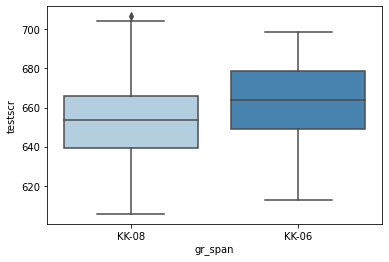

In [6]:
sns.boxplot(data['gr_span'],data['testscr'],palette='Blues')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='county', ylabel='testscr'>

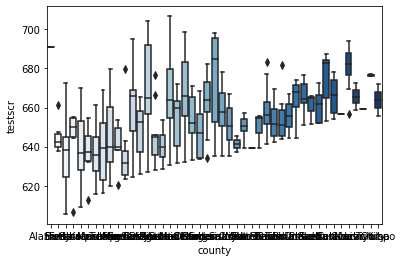

In [7]:
sns.boxplot(data['county'],data['testscr'],palette='Blues')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='district', ylabel='testscr'>

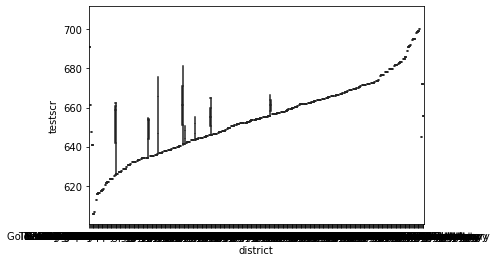

In [8]:
sns.boxplot(data['district'],data['testscr'],palette='Blues')

In [9]:
#解释gr_span 和 testscr 的boxplot

# task 2

Here we would like to explore the relationship between class size (str) and average test scores (testscr). I also want to take data transformation into my consideration. And we can notice from the (那个图) above, there seems to be a negative linear relationship between these two variables. Logically speaking, class size may determine the degree of interaction between teacher and students, which can affect students' average test scores. In this regard, it can be meaningful for us to explore the relationship between class size (str) and average test scores.


Here I assume average test scores (testscr) as response variable Y and class size (str) as predictor X1. Then I can assume that Y=β0 + β1*X1 + 𝜀. and here are my assumptions:

- Linearity: we can assume that 𝑋 = 𝑥, then we will get  Y=β0 + β1*X1 + 𝜀 for some population parameters 𝛽0 and 𝛽1 and a random error 𝜀. so it is true.

- Exogeneity: the conditional mean of ε given X is zero, that is 𝐸(𝜀|𝑋) = 0. Hence 𝐸(𝑌 |𝑋 = 𝑥) = 𝛽0 + 𝛽1*X.

- Constant error variance: 𝑉𝑎𝑟(𝜀|𝑋 = 𝑥) = 𝜎^2

- Independence: all the error pairs 𝜀i and 𝜀j (𝑖 ≠ 𝑗) are independent.

- The distribution of X is arbitrary (X can be even non-random).


SLR model 2.1:

testscr = 694.4437 - 2.0473*str




In [10]:
# sns.regplot(train['str'],train['testscr'],lowess=True)

In [11]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
formula = 'testscr ~ str'
ols1 = smf.ols(formula=formula, data=train).fit()
print(ols1.summary())
residuals=ols1.resid
rmse=ols1.mse_resid**0.5
print()
print()
print('rmse=',rmse)

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     15.03
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           0.000127
Time:                        13:51:40   Log-Likelihood:                -1453.7
No. Observations:                 336   AIC:                             2911.
Df Residuals:                     334   BIC:                             2919.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    694.4437     10.441     66.514      0.0

In [12]:
#####rmse 和 r-squared> fit 不强 >

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


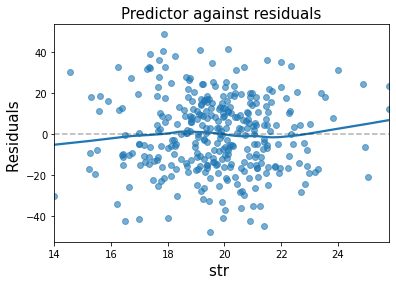

In [13]:
fig,ax = plt.subplots()
sns.regplot(train['str'],residuals,lowess=True,ax=ax,scatter_kws={'s':35,'alpha':0.6})
#residual 
ax.set_xlabel('str ',{'fontsize':15})
ax.set_ylabel('Residuals ',{'fontsize':15})
ax.set_title('Predictor against residuals',{'fontsize':15})
plt.axhline(color='Black',alpha=0.3,linestyle='--')

The residual plot shows the level of nonlinearity is small because when class size is greater than 16 and less than 23, it looks like a straight line, and it is more likely to fit linear with mild curve for fitted value.


Assumptions:
   - The groups are independent and the data iid in each group. This is likely true, since the class size does not depend on or is related to any other factor.
   - The data have finite 4th moments in each group. Testsrc hsd upper limits of 100(full mark), and lower limit of 0, while class size also has upper and lower limit, so this should be satisfied here. No clear, strong outliers are apparent in the residual plot either: outliers seem rare or non-existent here.
   - CLT is satisfied, needing at least 30 observations in each group. This is clearly satisifed here.
   - Homoskedasticity was assumed. we can assume that it is true cuz all the group seems to be equal varianced. 

[Text(0.5, 1.0, 'Linear-residual historical graph'),
 Text(0, 0.5, 'Freq'),
 Text(0.5, 0, 'Resid')]

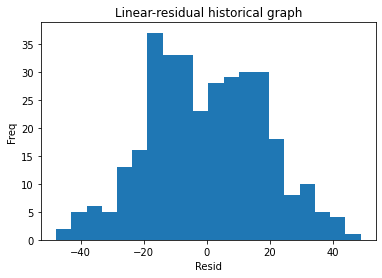

In [14]:
fig,ax=plt.subplots()
ax.hist(residuals,bins=20)
ax.set(title='Linear-residual historical graph',ylabel='Freq',xlabel='Resid')


As we can see here, the residual is not symmetric and it does not look like normality as well. but We perfer residuals that are close to symmertic and even close to normality.

# task 3

Text(0.5, 1.0, 'correlation matrix')

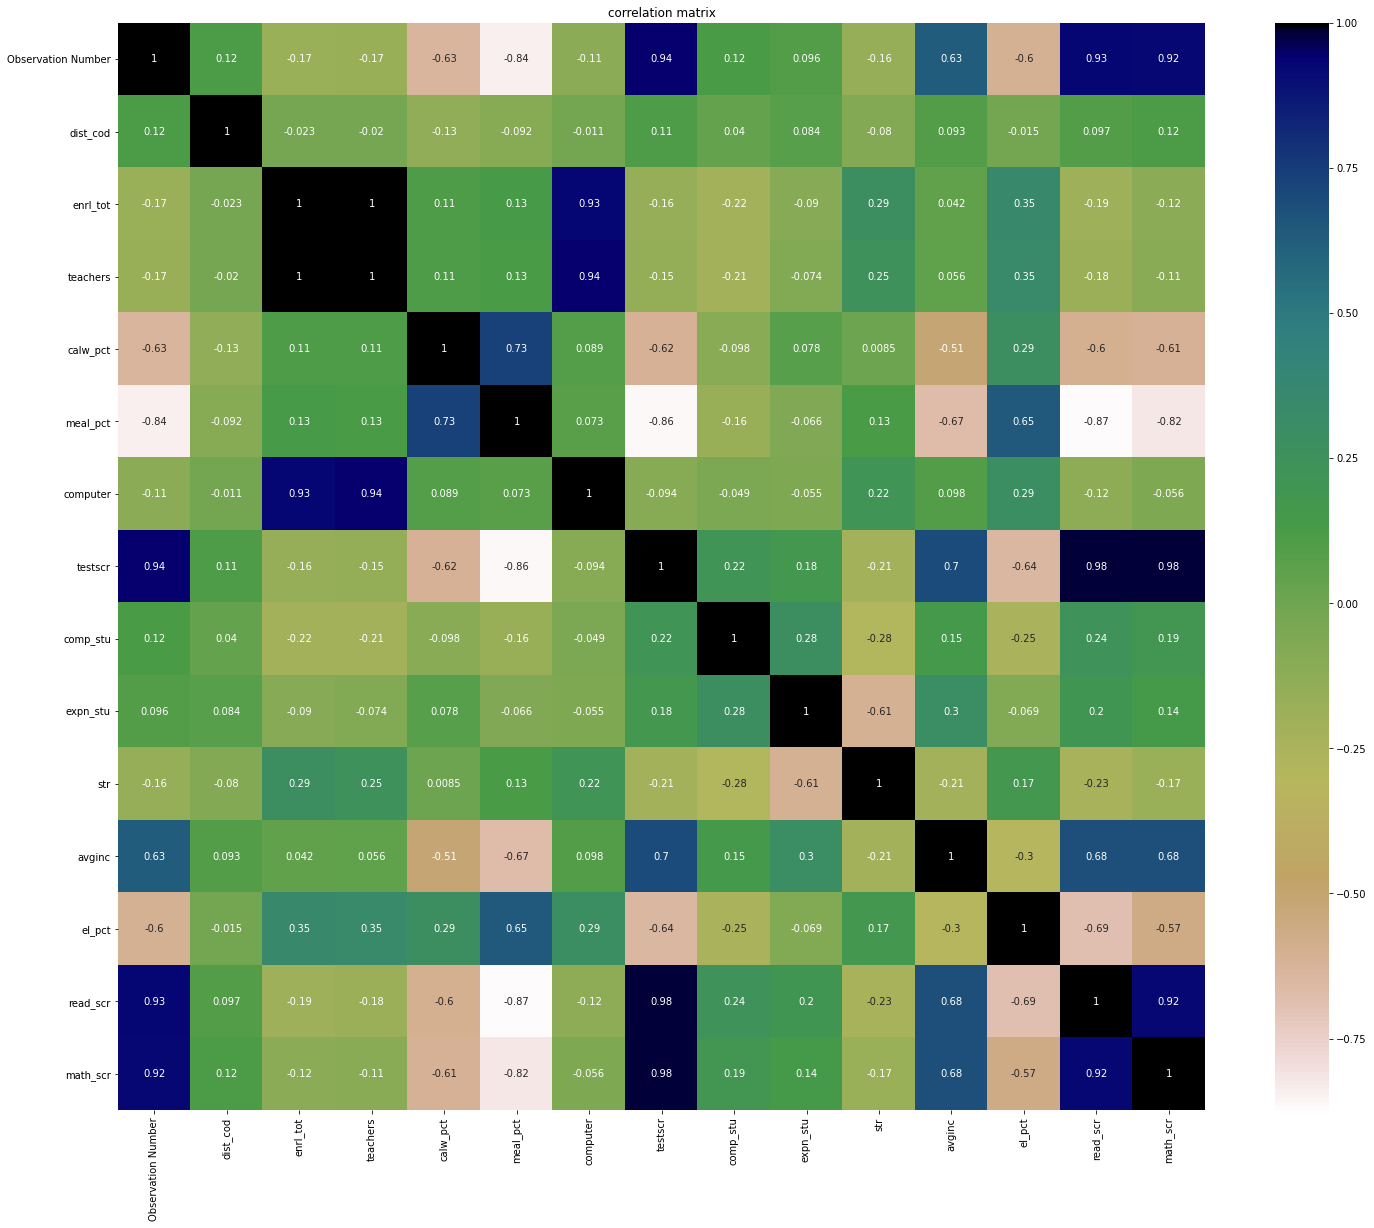

In [15]:
plt.subplots(figsize=(25,20))

sns.heatmap(train.corr(),square=True,annot=True,cmap='gist_earth_r')
plt.title('correlation matrix')


In [16]:
formula = 'testscr ~ str + meal_pct + comp_stu + expn_stu + avginc + el_pct'
ols2 = smf.ols(formula=formula, data=train).fit()
print(ols2.summary())
resid = ols2.resid
fitted = ols2.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     213.0
Date:                Mon, 07 Jun 2021   Prob (F-statistic):          4.22e-110
Time:                        13:51:42   Log-Likelihood:                -1194.6
No. Observations:                 336   AIC:                             2403.
Df Residuals:                     329   BIC:                             2430.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    665.3622     10.076     66.035      0.0

In [17]:
#rsuqared高 > fit 程度好 但是str的pvalue太大了
rmse=ols2.mse_resid**0.5
print(rmse)

8.559668555000377


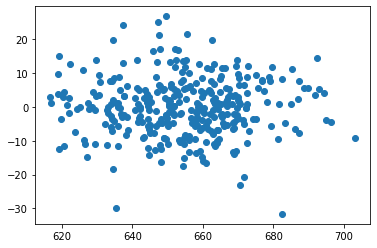

In [18]:
plt.scatter(fitted,resid)

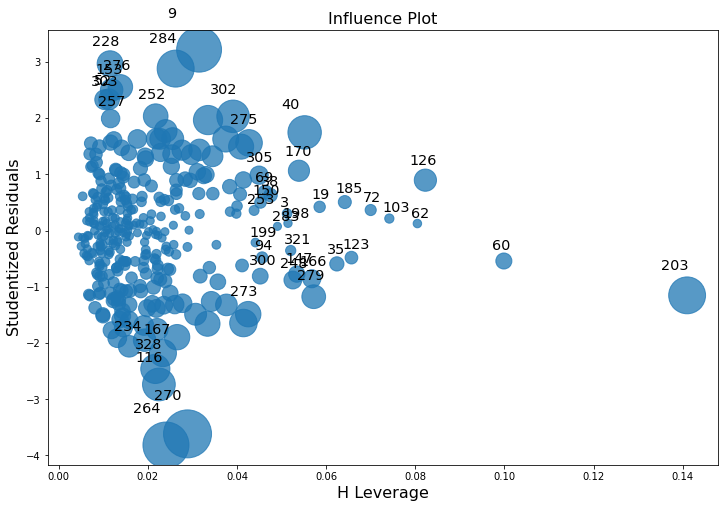

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(ols2, ax=ax, external=True, alpha=0.05, criterion="cooks")


############以上只是尝试 因为str的p-value太大了 重新选

In [20]:
formula = 'testscr ~ str + meal_pct + avginc  '
ols2 = smf.ols(formula=formula, data=train).fit()
print(ols2.summary())
resid = ols2.resid
fitted = ols2.fittedvalues

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     377.8
Date:                Mon, 07 Jun 2021   Prob (F-statistic):          1.18e-106
Time:                        13:51:43   Log-Likelihood:                -1211.7
No. Observations:                 336   AIC:                             2431.
Df Residuals:                     332   BIC:                             2447.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    683.8124      5.976    114.425      0.0

In [21]:
#此时 str的pvalue<0.05了 评估模型 rsquare高> fit程度高

In [22]:
rmse=ols2.mse_resid**0.5
print('rmse=',rmse)

rmse= 8.964217806141749


In [23]:
#vif multi correlaity.   > 都小于5 甚至小于 3。平均数小于3 > 共线性不严重
features= train[['str','meal_pct','avginc']]
features=sm.add_constant(features)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[]
for i in range(3):
    vif.append(variance_inflation_factor(features.values,i+1))

print(vif)


[1.048315062511293, 1.8342633345607535, 1.8914872214270853]


In [24]:
sum(vif)/len(vif)

1.5913552061663772

In [25]:
pred3_1=ols2.predict(train)
residuals=ols2.resid

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normal Q-Q plot for the residuals')

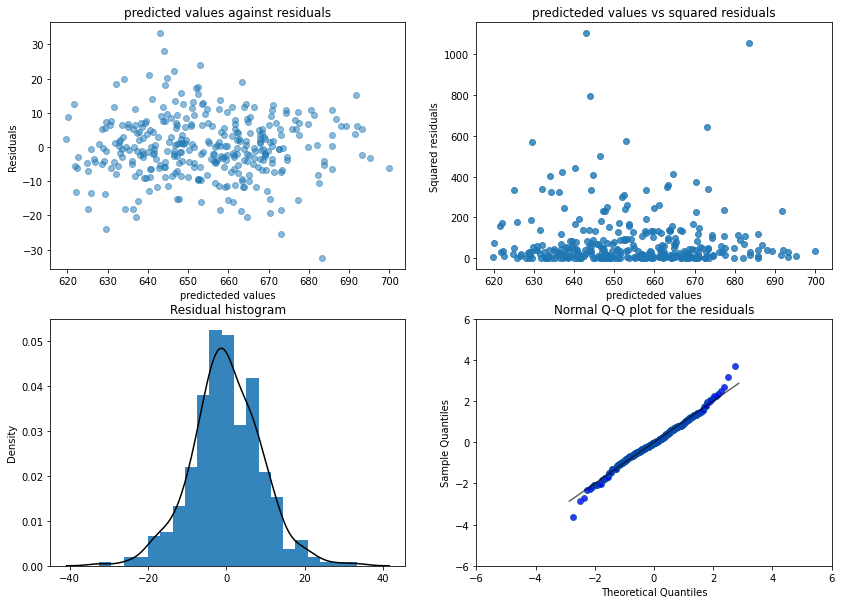

In [26]:
pred3_1=ols2.predict(train)
residuals=ols2.resid

fitted=pred3_1

fig, ax= plt.subplots(2,2, figsize=(14,10))
sns.regplot(fitted, residuals, fit_reg=False, ax=ax[0,0], scatter_kws={'alpha':0.5}) 
ax[0,0].set_xlabel('predicteded values')
ax[0,0].set_ylabel('Residuals')
ax[0,0].set_title('predicted values against residuals', fontsize=12)
sns.regplot(fitted, residuals**2, fit_reg=False, ax=ax[0,1]) 
ax[0,1].set_xlabel('predicteded values') 
ax[0,1].set_ylabel('Squared residuals')
ax[0,1].set_title('predicteded values vs squared residuals')
#sns.boxplot(residuals, orient='h', ax=ax[0,1]) #ax[0,1].set_title('Box plot for the residuals', fontsize=12)
sns.distplot(residuals, ax=ax[1,0], hist_kws={'alpha': 0.9}, kde_kws={'color': 'black', 'alpha': 0.6}) 
ax[1,0].set(title='Residual histogram')
pp = sm.ProbPlot(residuals, fit=True)
qq = pp.qqplot(color=sns.color_palette('Blues')[-1], alpha=0.8, ax=ax[1,1]) 
a=ax[1,1].get_xlim()[0]
b=ax[1,1].get_xlim()[1]
ax[1,1].plot([a,b],[a,b], color='black', alpha=0.6)
ax[1,1].set_xlim(-6,6)
ax[1,1].set_ylim(-6,6)
ax[1,1].set_title('Normal Q-Q plot for the residuals')

Text(0.5, 0, 'Index')

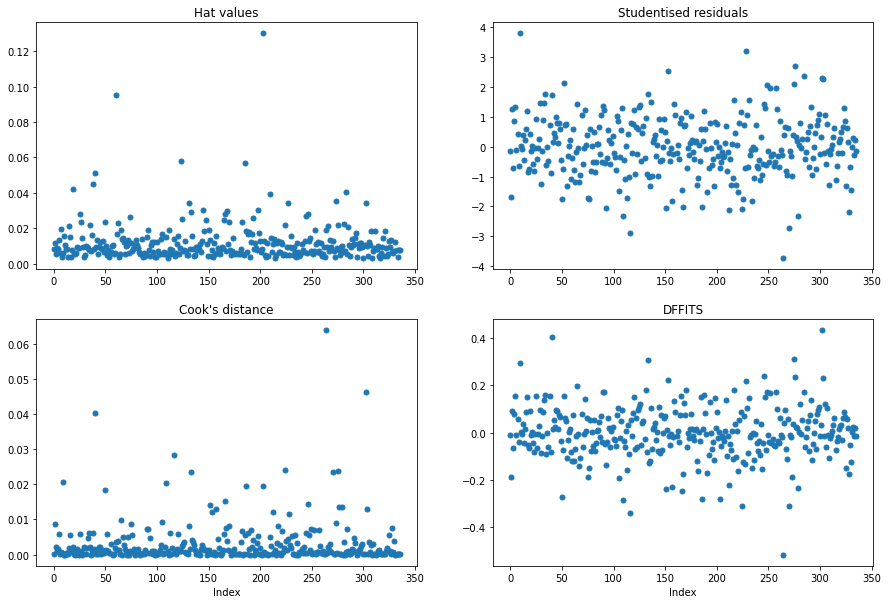

In [27]:
influence=ols2.get_influence()
hat = influence.hat_matrix_diag
resid= influence.resid_studentized_external 
d= influence.cooks_distance[0]
dffits= influence.dffits[0]
fig, ax= plt.subplots(2, 2, figsize=(15, 10)) 
ax[0,0].scatter(np.arange(0,len(hat)), hat, s=25)
ax[0,0].set_title('Hat values') 
ax[0,1].scatter(np.arange(0,len(resid)), resid, s=25)
ax[0,1].set_title('Studentised residuals')
ax[1,0].scatter(np.arange(0,len(d)), d, s=25) 
ax[1,0].set_title('Cook\'s distance') 
ax[1,0].set_xlabel('Index')
ax[1,1].scatter(np.arange(0,len(dffits)), dffits, s=25) 
ax[1,1].set_title('DFFITS') 
ax[1,1].set_xlabel('Index')


In [28]:
###check assumption

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


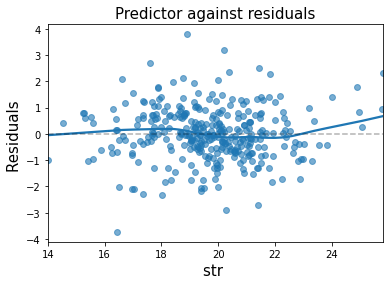

In [29]:

fig,ax = plt.subplots()
sns.regplot(train['str'],resid,lowess=True,ax=ax,scatter_kws={'s':35,'alpha':0.6})
ax.set_xlabel('str ',{'fontsize':15})
ax.set_ylabel('Residuals ',{'fontsize':15})
ax.set_title('Predictor against residuals',{'fontsize':15})
plt.axhline(color='Black',alpha=0.3,linestyle='--')

The residual plot shows the model's goodness of fit is good overall despite that when str is greater than 22, it looks non-linear.


Assumptions:
   - The groups are independent and the data iid in each group. This is likely true, since the varibles that we selected do not depend on or is related to any other factor.
   - The data have finite 4th moments in each group. Testsrc hsd upper limits of 100(full mark), and lower limit of 0, while all other variables also has upper and lower limit, so this should be satisfied here. No clear, strong outliers are apparent in the residual plot either: outliers seem rare or non-existent here.
   - CLT is satisfied, needing at least 30 observations in each group. This is clearly satisifed here.
   - Homoskedasticity was assumed. we can assume that it is true cuz all the group seems to be equal varianced. 

[Text(0.5, 1.0, 'Linear-residual historical graph'),
 Text(0, 0.5, 'Freq'),
 Text(0.5, 0, 'Resid')]

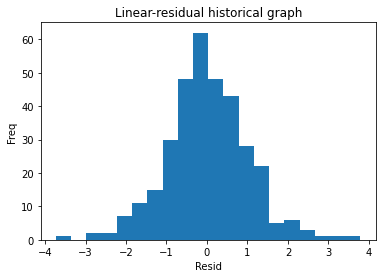

In [30]:
fig,ax=plt.subplots()
ax.hist(resid,bins=20)
ax.set(title='Linear-residual historical graph',ylabel='Freq',xlabel='Resid')


# tesk 4

In [31]:
#3## intercation effects > gr_span (catagorical variable)

gr_span_category={'KK-08':1,'KK-06':0}
train['gr_span']=train['gr_span'].replace(gr_span_category)
train['gr_span'].value_counts()

1    288
0     48
Name: gr_span, dtype: int64

In [32]:
# import seaborn as sns
# sns.set(style='ticks')
# g = sns.factorplot(x='str',y='testscr',hue='el_pct',data=train)
# g.despine(left=True)
# sns.plt.show()
#跑起来巨慢 >>> probably 换 hue 提高performence  每次跑到这里kernal就挂了🤔🤔🤔 idk y， 做三个变量intercation

In [33]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [34]:
#task chunk 1 看直方图 > 哪些有明显的skewness 》 log

In [35]:
train['logged_inc']=np.log(train['avginc'])
train['logged_expn']=np.log(train['expn_stu'])

test['logged_inc']=np.log(test['avginc'])
test['logged_expn']=np.log(test['expn_stu'])

In [36]:
## interection effect   gr_span和 calw_pct. ///.   str和el_pct   》〉》选两组 之后可能会变 

train['gr_calw']=train['gr_span']* train['calw_pct']
train['str_el']=train['str']* train['el_pct']


NameError: name 'resi3' is not defined

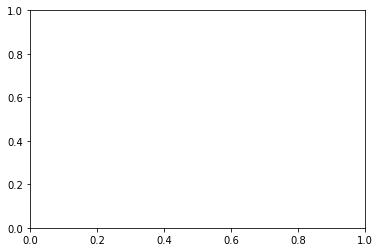

In [37]:
fig,ax = plt.subplots()
sns.regplot(train['avginc'],resi3,lowess=True,ax=ax,scatter_kws={'s':35,'alpha':0.6})
ax.set_xlabel('avginc ',{'fontsize':15})
ax.set_ylabel('Residuals ',{'fontsize':15})
ax.set_title('Predictor against residuals',{'fontsize':15})
plt.axhline(color='Black',alpha=0.3,linestyle='--')

fig,ax = plt.subplots()
sns.regplot(train['logged_inc'],resi3,lowess=True,ax=ax,scatter_kws={'s':35,'alpha':0.6})
ax.set_xlabel('logged_inc ',{'fontsize':15})
ax.set_ylabel('Residuals ',{'fontsize':15})
ax.set_title('Predictor against residuals',{'fontsize':15})
plt.axhline(color='Black',alpha=0.3,linestyle='--')

In [ ]:
fig,ax = plt.subplots()
sns.regplot(train['expn_stu'],resi3,lowess=True,ax=ax,scatter_kws={'s':35,'alpha':0.6})
ax.set_xlabel('expn_stu ',{'fontsize':15})
ax.set_ylabel('Residuals ',{'fontsize':15})
ax.set_title('Predictor against residuals',{'fontsize':15})
plt.axhline(color='Black',alpha=0.3,linestyle='--')

fig,ax = plt.subplots()
sns.regplot(train['logged_expn'],resi3,lowess=True,ax=ax,scatter_kws={'s':35,'alpha':0.6})
ax.set_xlabel('logged_expn ',{'fontsize':15})
ax.set_ylabel('Residuals ',{'fontsize':15})
ax.set_title('Predictor against residuals',{'fontsize':15})
plt.axhline(color='Black',alpha=0.3,linestyle='--')

In [ ]:
train['log_comstu']=np.log(train['comp_stu'])
test['log_comstu']=np.log(test['comp_stu'])

fig,ax = plt.subplots()
sns.regplot(train['comp_stu'],resi3,lowess=True,ax=ax,scatter_kws={'s':35,'alpha':0.6})
ax.set_xlabel('comp_stu ',{'fontsize':15})
ax.set_ylabel('Residuals ',{'fontsize':15})
ax.set_title('Predictor against residuals',{'fontsize':15})
plt.axhline(color='Black',alpha=0.3,linestyle='--')

fig,ax = plt.subplots()
sns.regplot(train['log_comstu'],resi3,lowess=True,ax=ax,scatter_kws={'s':35,'alpha':0.6})
ax.set_xlabel('log_comstu ',{'fontsize':15})
ax.set_ylabel('Residuals ',{'fontsize':15})
ax.set_title('Predictor against residuals',{'fontsize':15})
plt.axhline(color='Black',alpha=0.3,linestyle='--')

In [ ]:
train['log_meal']=np.log(train['meal_pct'])
test['log_meal']=np.log(test['meal_pct'])




fig,ax = plt.subplots()
sns.regplot(train['meal_pct'],resi3,lowess=True,ax=ax,scatter_kws={'s':35,'alpha':0.6})
ax.set_xlabel('meal_pct ',{'fontsize':15})
ax.set_ylabel('Residuals ',{'fontsize':15})
ax.set_title('Predictor against residuals',{'fontsize':15})
plt.axhline(color='Black',alpha=0.3,linestyle='--')

fig,ax = plt.subplots()
sns.regplot(train['log_meal'],resi3,lowess=True,ax=ax,scatter_kws={'s':35,'alpha':0.6})
ax.set_xlabel('log_meal ',{'fontsize':15})
ax.set_ylabel('Residuals ',{'fontsize':15})
ax.set_title('Predictor against residuals',{'fontsize':15})
plt.axhline(color='Black',alpha=0.3,linestyle='--')


In [ ]:
train.head()

In [57]:
#找九个variable 做linear regression
formula3 = 'testscr ~ logged_inc + str+ el_pct +logged_expn + calw_pct + meal_pct +gr_span + gr_calw + str_el'
ols3 = smf.ols(formula=formula3,data=train).fit()
resi3=ols3.resid
fitted3=ols3.fittedvalues
print(ols3.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     137.9
Date:                Mon, 07 Jun 2021   Prob (F-statistic):          1.54e-105
Time:                        16:21:58   Log-Likelihood:                -1197.3
No. Observations:                 336   AIC:                             2415.
Df Residuals:                     326   BIC:                             2453.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     621.0663     53.187     11.677      

In [ ]:
###分析上面这个 rsquared(越大越好) 和rmse （越小越好）
rmse3=ols3.mse_resid**0.5
print('rmse= ',rmse3)



In [ ]:
import forward_selection 

In [ ]:
model_forward = forward_selection.forward_selected(train[['logged_inc','str','el_pct','logged_expn','calw_pct','meal_pct','gr_span','gr_calw','str_el','testscr']],'testscr',nominated=[])

In [62]:
formula3 = 'testscr ~ meal_pct + logged_inc + str_el + gr_span + logged_expn + calw_pct + el_pct + str + 1'
ols3 = smf.ols(formula=formula3,data=train).fit()
resi3=ols3.resid
fitted3=ols3.fittedvalues
print(ols3.summary())
rmse3=ols3.mse_resid**0.5
print('rmse= ',rmse3)

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     155.5
Date:                Mon, 07 Jun 2021   Prob (F-statistic):          1.35e-106
Time:                        17:00:15   Log-Likelihood:                -1197.4
No. Observations:                 336   AIC:                             2413.
Df Residuals:                     327   BIC:                             2447.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     617.7494     52.681     11.726      

In [ ]:
##forward model 有str

In [ ]:
import backward_selection 
model_backward = backward_selection.backward_selected(train[['logged_inc','str','el_pct','logged_expn','calw_pct','meal_pct','gr_span','gr_calw','str_el','testscr']],'testscr',nominated=[])

In [ ]:
formula3 = 'testscr ~ el_pct + gr_span + meal_pct + calw_pct + logged_inc + str_el + str + 1'
ols3 = smf.ols(formula=formula3,data=train).fit()
resi3=ols3.resid
fitted3=ols3.fittedvalues
print(ols3.summary())
rmse3=ols3.mse_resid**0.5
print('rmse= ',rmse3)

In [53]:
train['sqrt_el']=np.sqrt(train['el_pct'])
test['sqrt_el']=np.sqrt(test['el_pct'])



formula3 = 'testscr ~ str + meal_pct + avginc +calw_pct + sqrt_el '
ols3 = smf.ols(formula=formula3,data=train).fit()
resi3=ols3.resid
fitted3=ols3.fittedvalues
print(ols3.summary())
rmse3=ols3.mse_resid**0.5
print('rmse= ',rmse3)

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     257.1
Date:                Mon, 07 Jun 2021   Prob (F-statistic):          1.77e-111
Time:                        16:12:56   Log-Likelihood:                -1194.3
No. Observations:                 336   AIC:                             2401.
Df Residuals:                     330   BIC:                             2423.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    674.0974      5.941    113.471      0.0

In [ ]:
### backword model 有str 

In [ ]:
#测assumption  > residual plot 有non-linearity  > fitness 还行
fig,ax = plt.subplots()
sns.regplot(train['str'],resi3,lowess=True,ax=ax,scatter_kws={'s':35,'alpha':0.6})
ax.set_xlabel('str ',{'fontsize':15})
ax.set_ylabel('Residuals ',{'fontsize':15})
ax.set_title('Predictor against residuals',{'fontsize':15})
plt.axhline(color='Black',alpha=0.3,linestyle='--')

In [ ]:
#vif  》 forward model的  > 有一个巨大 淦
features= train[['meal_pct','logged_inc','str_el','gr_span','logged_expn','calw_pct','el_pct','str']]
features=sm.add_constant(features)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[]
for i in range(8):
    vif.append(variance_inflation_factor(features.values,i+1))

print(vif)

In [ ]:
sum(vif)/len(vif)   #》〉5，被那个巨大的拉大了 要把那个抛掉  有个共线性 巨强  

In [53]:
####### vif巨大 >>>> 这个forward的不太好 > 做八个不同的模型 >>>> 选八次


###linear regression / polynomial/ spline /category 

# tesk 6

In [55]:
#所有模型有test建 ，在此之前做和task4里对数据进行的处理一样的log和 intersection

In [58]:

#1 forward model 见4
#2 formula='testscr ~ str + np.power(str,2)+....'    ###quadratic regression 求r^2 和rmse  模仿上面的写
#3 regression span  .25   .75  span之后再用forward或者backward来优化 》包不包括str   》 implement on test set > 求r^2 和rmse > evaluation 画residual 》 assumption
#tut 11/12
#4 regression span的forward
         b b f
#5 regression span 的backswad




In [ ]:
#数据预处理 test集

# formula ='testscr ~ str/str-related +.....'   > .... 根据task1 图1 和correlation matrix加 
# r-squared 》 越大越好 和 rmse 》 越小越好
# residual plot > check assumption ,linearity #差不多就行了
# vif vif-mean(vif<5 合格，vif<3特别好 ) #####难满足


# backward 和forward

In [39]:

gr_span_category={'KK-08':1,'KK-06':0}
test['gr_span']=test['gr_span'].replace(gr_span_category)
test['gr_span'].value_counts()


test['gr_calw']=test['gr_span']* test['calw_pct']
test['str_span']=test['str']* test['gr_span']
test['gr_computer']=test['gr_span']* test['computer']

In [43]:
train['gr_calw']=train['gr_span']* train['calw_pct']
train['str_span']=train['str']* train['gr_span']
train['gr_computer']=train['gr_span']* train['computer']

formula = 'testscr ~ str + meal_pct +calw_pct+ computer+ comp_stu + expn_stu + avginc + el_pct+gr_calw+str_span'
ols2 = smf.ols(formula=formula, data=train).fit()
print(ols2.summary())
resid2 = ols2.resid
fitted2 = ols2.fittedvalues

#best

rmse3=ols2.mse_resid**0.5
print('rmse= ',rmse3)

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     130.9
Date:                Mon, 07 Jun 2021   Prob (F-statistic):          1.32e-107
Time:                        15:42:43   Log-Likelihood:                -1189.8
No. Observations:                 336   AIC:                             2402.
Df Residuals:                     325   BIC:                             2444.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    666.5492     10.239     65.097      0.0

In [41]:
formula3 = 'testscr ~str+ meal_pct+calw_pct+computer+comp_stu+expn_stu+avginc+el_pct+gr_calw+str_span'
ols3 = smf.ols(formula=formula3,data=test).fit()
resi3=ols3.resid
fitted3=ols3.fittedvalues
print(ols3.summary())
rmse3=ols3.mse_resid**0.5
print('rmse= ',rmse3)

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     56.05
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           3.35e-30
Time:                        15:33:21   Log-Likelihood:                -281.02
No. Observations:                  84   AIC:                             584.0
Df Residuals:                      73   BIC:                             610.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    633.9886     19.736     32.123      0.0

In [51]:
yp_fs1k=ols2.predict({'str': test['str'],'meal_pct':test['meal_pct'],'calw_pct': test['calw_pct'],'computer': test['computer'],'comp_stu': test['comp_stu'],'expn_stu': test['expn_stu'],'avginc': test['avginc'],'el_pct': test['el_pct'],'gr_calw': test['gr_calw'],'str_span': test['str_span']})

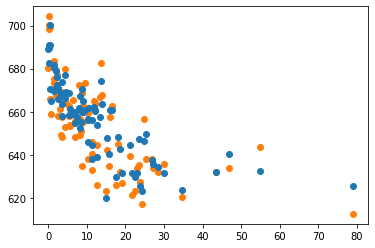

In [52]:
tableau=['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8c564b', '#e377c2', '#7f7f7f']

plt.scatter(test['calw_pct'], test['testscr'], color=tableau[1])
plt.scatter(test['calw_pct'], yp_fs1k)
# plt.scatter(test['calw_pct'], ols3, color=tableau[2])

In [54]:
train['sqrt_el']=np.sqrt(train['el_pct'])
test['sqrt_el']=np.sqrt(test['el_pct'])



formula3 = 'testscr ~ str + meal_pct + avginc +calw_pct + sqrt_el '
ols3 = smf.ols(formula=formula3,data=test).fit()
resi3=ols3.resid
fitted3=ols3.fittedvalues
print(ols3.summary())
rmse3=ols3.mse_resid**0.5
print('rmse= ',rmse3)

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     98.31
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           3.29e-32
Time:                        16:13:26   Log-Likelihood:                -288.27
No. Observations:                  84   AIC:                             588.5
Df Residuals:                      78   BIC:                             603.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    679.5886     11.880     57.205      0.0

In [55]:
yp_fs1k=ols3.predict({'str': test['str'],'meal_pct':test['meal_pct'],'avginc': test['avginc'],'calw_pct': test['calw_pct'],'sqrt_el': test['sqrt_el']})

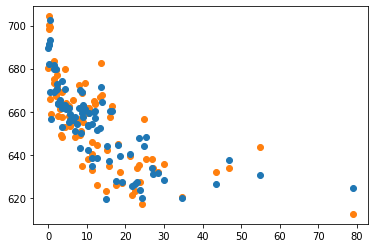

In [56]:
tableau=['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8c564b', '#e377c2', '#7f7f7f']

plt.scatter(test['calw_pct'], test['testscr'], color=tableau[1])
plt.scatter(test['calw_pct'], yp_fs1k)
# plt.scatter(test['calw_pct'], ols3, color=tableau[2])

In [60]:
test['gr_calw']=test['gr_span']* test['calw_pct']
test['str_el']=test['str']* test['el_pct']

formula3 = 'testscr ~ logged_inc + str+ el_pct +logged_expn + calw_pct + meal_pct +gr_span + gr_calw + str_el'
ols4 = smf.ols(formula=formula3,data=test).fit()
resi4=ols4.resid
fitted3=ols4.fittedvalues
print(ols4.summary())
rmse3=ols4.mse_resid**0.5
print('rmse= ',rmse3)

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     58.92
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           3.77e-30
Time:                        16:25:34   Log-Likelihood:                -283.57
No. Observations:                  84   AIC:                             587.1
Df Residuals:                      74   BIC:                             611.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     360.3576     96.352      3.740      

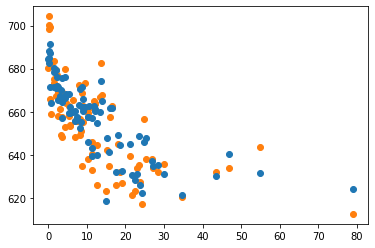

In [61]:
yp_fs1k=ols3.predict({'logged_inc': test['logged_inc'],'str':test['str'],'el_pct': test['el_pct'],'logged_expn': test['logged_expn'],'calw_pct': test['calw_pct'],'meal_pct': test['meal_pct'],'gr_span': test['gr_span'],'gr_calw': test['gr_calw'],'str_el': test['str_el']})
tableau=['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8c564b', '#e377c2', '#7f7f7f']

plt.scatter(test['calw_pct'], test['testscr'], color=tableau[1])
plt.scatter(test['calw_pct'], yp_fs1k)
# plt.scatter(test['calw_pct'], ols3, color=tableau[2])

In [63]:
formula3 = 'testscr ~ meal_pct + logged_inc + str_el + gr_span + logged_expn + calw_pct + el_pct + str + 1'
ols3 = smf.ols(formula=formula3,data=test).fit()
resi3=ols3.resid
fitted3=ols3.fittedvalues
print(ols3.summary())
rmse3=ols3.mse_resid**0.5
print('rmse= ',rmse3)

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     65.24
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           1.15e-30
Time:                        17:01:13   Log-Likelihood:                -284.65
No. Observations:                  84   AIC:                             587.3
Df Residuals:                      75   BIC:                             609.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     358.8162     96.936      3.702      

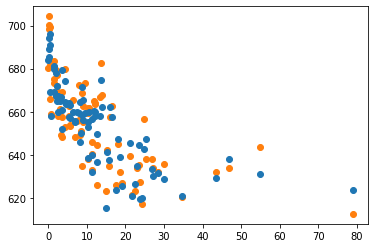

In [64]:
yp_fs1k=ols3.predict({'meal_pct': test['meal_pct'],'logged_inc':test['logged_inc'],'str_el': test['str_el'],'gr_span': test['gr_span'],'logged_expn': test['logged_expn'],'calw_pct': test['calw_pct'],'el_pct': test['el_pct'],'str': test['str']})
tableau=['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8c564b', '#e377c2', '#7f7f7f']

plt.scatter(test['calw_pct'], test['testscr'], color=tableau[1])
plt.scatter(test['calw_pct'], yp_fs1k)
# plt.scatter(test['calw_pct'], ols3, color=tableau[2])

In [65]:
formula3 = 'testscr ~ el_pct + gr_span + meal_pct + calw_pct + logged_inc + str_el + str + 1'
ols3 = smf.ols(formula=formula3,data=test).fit()
resi3=ols3.resid
fitted3=ols3.fittedvalues
print(ols3.summary())
rmse3=ols3.mse_resid**0.5
print('rmse= ',rmse3)

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     65.74
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           1.18e-29
Time:                        17:08:19   Log-Likelihood:                -289.71
No. Observations:                  84   AIC:                             595.4
Df Residuals:                      76   BIC:                             614.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    653.4309     20.034     32.617      0.0

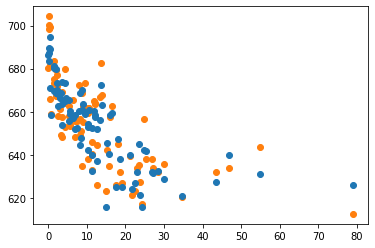

In [66]:
yp_fs1k=ols3.predict({'el_pct': test['el_pct'],'gr_span':test['gr_span'],'meal_pct': test['meal_pct'],'calw_pct': test['calw_pct'],'logged_inc': test['logged_inc'],'str_el': test['str_el'],'str': test['str']})
tableau=['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8c564b', '#e377c2', '#7f7f7f']

plt.scatter(test['calw_pct'], test['testscr'], color=tableau[1])
plt.scatter(test['calw_pct'], yp_fs1k)
# plt.scatter(test['calw_pct'], ols3, color=tableau[2])